### Load libraries 




In [1]:
import pandas as pd
from IPython import display

import os 
import sys

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.1.3'

In [3]:
#!pwd
print(os.getcwd())

/home/ysk2a15/mydocuments/GDP/gdp-wild-dogs


### Checking OS system 
- slight difference in file path for different OS systems:
    - linux: '/home/user/Data'
    - windows: 'C:\\user\\Data'

In [4]:
os_system = sys.platform
if os_system.startswith('win'):
    os_system = 'windows'
print('OS System: ', os_system)

OS System:  linux


### List Directory Tree

In [5]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [6]:
list_files(os.path.join(os.getcwd(), 'Data'))

Data/
    2020-11-27/
        cut.pkl
        raw.pkl
        201127_807d3a2a0fe8_xyz.pkl
        cutoff.txt
        labels.csv
    2020-12-03/
        201203_807d3a2a0fe8_xyz.pkl
        201203_807d3a2a0fe8.pkl
    2020-11-26/
        201126_807d3a2a0fe8_xyz.pkl
        cut.pkl
        raw.pkl
        cutoff.txt
        labels.csv
    2020-11-16/
        cut.pkl
        raw.pkl
        cutoff.txt
        201116_807d3a2a0fe8_xyz.pkl
        labels.csv
    2020-11-28/
        raw.pkl
        201128_807d3a2a0fe8_xyz.pkl
    2020-11-23/
        cut.pkl
        raw.pkl
        cutoff.txt
        labels.csv
        201123_807d3a2a0fe8_xyz.pkl
    2020-11-05/
        cut.pkl
        raw.pkl
        cutoff.txt
        201105_807d3a2a0fe8_xyz.pkl
        labels.csv


 ### Loading pkl files into DFs

In [7]:
dfList=[]
csvDFList=[]

# Directories are according to git's file structure 
# [Linux] ./gdp-wild-dogs/Data/
if os_system == 'linux':
    filepath = './Data'
    pathstyle = '/'
elif os_system == 'windows':
    filepath = 'Data'
    pathstyle = '\\'

#Store pkl from each day in df in list
for subdir, dirs, files in os.walk(filepath):
    for filename in os.listdir(subdir):
        if filename == "cut.pkl":
            df = pd.read_pickle(subdir+pathstyle+ filename)
            df.reset_index(inplace=True)
            dfList.append(df)
        if filename == "labels.csv":
            df = pd.read_csv(subdir+pathstyle+filename)
            df.reset_index(inplace=True)
            csvDFList.append(df)
print("Number of data files:")
print(len(dfList))

Number of data files:
5


In [8]:
for df in dfList:
    if(len(df["dt"]) > 0):
        print(str(df["dt"][0])[0:10])
        display.display(df.describe())

2020-11-27


,index,seq_counter,ms_counter,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
count,55349.000000,55349.000000,5.534900e+04,55349.000000,55349.000000,55349.000000,5.534900e+04,55349.000000,55349.000000
mean,142475.000000,24.496576,2.855493e+06,-558.998446,-37.440207,-737.303294,2.668183e+03,215.857468,1166.381055
std,15978.024362,14.423795,3.195605e+05,620.526233,603.571494,664.823289,1.108704e+05,78036.689218,101335.105787
min,114801.000000,0.000000,2.302013e+06,-7376.000000,-6487.000000,-7674.000000,-1.060080e+06,-738290.000000,-856170.000000
25%,128638.000000,12.000000,2.578753e+06,-710.000000,-378.000000,-884.000000,-3.766000e+04,-26390.000000,-35280.000000
50%,142475.000000,24.000000,2.855493e+06,-533.000000,-71.000000,-702.000000,3.500000e+02,0.000000,630.000000
75%,156312.000000,37.000000,3.132233e+06,-336.000000,294.000000,-539.000000,4.165000e+04,26040.000000,38150.000000
max,170149.000000,49.000000,3.408973e+06,3887.000000,5791.000000,4210.000000,9.374400e+05,716170.000000,911750.000000


2020-11-26


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,1.780210e+05,178021.000000,178021.000000,178021.000000,178021.000000,1.780210e+05,178021.000000,1.780210e+05,178021.000000
mean,1.368806e+06,547.496245,28.904230,-390.675387,-2921.359177,-4.615855e+02,1682.975424,2.013806e+06,24.498458
std,5.139038e+04,652.381048,634.201074,611.439068,78737.553151,7.375871e+04,74386.824634,1.575479e+06,14.428949
min,1.279796e+06,-7961.000000,-7923.000000,-7989.000000,-875210.000000,-1.687630e+06,-956970.000000,5.993000e+03,0.000000
25%,1.324301e+06,213.000000,-341.000000,-710.000000,-32340.000000,-2.688000e+04,-29120.000000,9.126530e+05,12.000000
50%,1.368806e+06,561.000000,0.000000,-438.000000,-630.000000,2.100000e+02,910.000000,1.802753e+06,24.000000
75%,1.413311e+06,846.000000,384.000000,-145.000000,28770.000000,2.702000e+04,31150.000000,2.692853e+06,37.000000
max,1.457816e+06,7979.000000,7279.000000,5648.000000,879900.000000,1.828680e+06,808220.000000,7.196216e+06,49.000000


2020-11-16


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,134699.000000,134699.000000,134699.000000,134699.000000,1.346990e+05,1.346990e+05,134699.000000,1.346990e+05,134699.000000
mean,211600.000000,642.965122,0.948908,-666.393091,5.265697e+02,2.265346e+02,1981.559588,4.237993e+06,24.498274
std,38884.396292,552.142585,534.946670,507.614990,1.046683e+05,7.050509e+04,93278.141436,7.776879e+05,14.425461
min,144251.000000,-6648.000000,-6295.000000,-7421.000000,-1.238860e+06,-1.342670e+06,-858620.000000,2.891013e+06,0.000000
25%,177925.500000,455.000000,-341.000000,-792.000000,-3.780000e+04,-2.408000e+04,-33180.000000,3.564503e+06,12.000000
50%,211600.000000,608.000000,-45.000000,-641.000000,3.500000e+02,-2.800000e+02,1540.000000,4.237993e+06,24.000000
75%,245274.500000,772.000000,303.000000,-512.000000,3.766000e+04,2.254000e+04,35980.000000,4.911483e+06,37.000000
max,278949.000000,7546.000000,6607.000000,5288.000000,1.342320e+06,1.083390e+06,974050.000000,5.584973e+06,49.000000


2020-11-23


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,96299.000000,96299.000000,96299.000000,96299.000000,96299.000000,96299.000000,96299.000000,9.629900e+04,96299.000000
mean,188259.000000,685.967123,184.909885,-585.422839,-2062.369339,-342.111652,1764.676518,4.134299e+07,24.495041
std,27799.271124,394.235820,441.988140,306.318561,66914.127434,57204.250937,62732.408114,5.559854e+05,14.422804
min,140110.000000,-2221.000000,-2775.000000,-5617.000000,-475650.000000,-425810.000000,-480060.000000,4.038001e+07,0.000000
25%,164184.500000,483.000000,-70.000000,-747.000000,-37590.000000,-29890.000000,-32410.000000,4.086150e+07,12.000000
50%,188259.000000,658.000000,227.000000,-572.000000,-2660.000000,-630.000000,280.000000,4.134299e+07,24.000000
75%,212333.500000,859.000000,481.000000,-422.000000,33320.000000,27580.000000,34790.000000,4.182448e+07,37.000000
max,236408.000000,5081.000000,3849.000000,1198.000000,599200.000000,616980.000000,586670.000000,4.230597e+07,49.000000


2020-11-05


,index,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,5.160300e+04,51603.000000,51603.000000,51603.000000,51603.000000,51603.000000,5.160300e+04,5.160300e+04,51603.000000
mean,1.776850e+06,-593.534077,-282.372672,-607.041606,-1613.547274,-4044.129508,-5.850420e+03,5.655464e+05,24.494913
std,1.489665e+04,924.074716,738.856394,893.257968,133615.227727,106539.700871,1.288504e+05,5.078591e+05,14.426775
min,1.751049e+06,-7994.000000,-7860.000000,-7989.000000,-982590.000000,-714070.000000,-9.460500e+05,5.993000e+03,0.000000
25%,1.763950e+06,-883.000000,-656.000000,-901.000000,-62930.000000,-56280.000000,-5.950000e+04,2.839230e+05,12.000000
50%,1.776850e+06,-499.000000,-339.000000,-525.000000,-70.000000,-3640.000000,-3.360000e+03,5.419330e+05,24.000000
75%,1.789750e+06,-117.000000,67.000000,-132.000000,58170.000000,44380.000000,4.704000e+04,7.999430e+05,37.000000
max,1.802651e+06,4713.000000,7825.000000,4820.000000,912170.000000,814030.000000,1.127840e+06,7.196453e+06,49.000000


In [9]:
for df in csvDFList:
    df.describe()
    print(str(df["start_time"][0])[0:10] + " Labels Loaded")
    print(df.head())
    print()

for df in dfList:
    if(len(df["dt"]) > 0):
        print(str(df["dt"][0])[0:10] + " Clipped Device Data Loaded")
        print(df.head())
        print()

2020-11-27 Labels Loaded
   index                  start_time                    end_time   activity
0      0  2020-11-27 14:09:39.428457  2020-11-27 14:09:42.853634     laying
1      1  2020-11-27 14:09:43.696836  2020-11-27 14:09:46.413592  galloping
2      2  2020-11-27 14:09:49.945660  2020-11-27 14:09:52.640981  galloping
3      3  2020-11-27 14:09:55.582014  2020-11-27 14:09:57.578928   standing
4      4  2020-11-27 14:10:00.794580  2020-11-27 14:10:01.955902  galloping

2020-11-26 Labels Loaded
   index                  start_time                    end_time   activity
0      0  2020-11-26 13:36:46.229766  2020-11-26 13:36:57.575212  galloping
1      1  2020-11-26 13:36:58.259283  2020-11-26 13:37:04.573460   trotting
2      2  2020-11-26 13:37:04.573460  2020-11-26 13:37:15.839838  galloping
3      3  2020-11-26 13:37:17.628225  2020-11-26 13:37:21.307959   trotting
4      4  2020-11-26 13:37:23.889529  2020-11-26 13:37:28.547121    walking

2020-11-16 Labels Loaded
   index   

In [10]:
def label_data(dfList, csvDFList):
    labelledDFList = []
    for dfIndex in range(0, len(dfList)):
        labels = []
        df = dfList[dfIndex]
        if('activity' in df.columns):
            df.drop('activity', 1, inplace=True)
        labelledDFList.append(df)
        csv = csvDFList[dfIndex]
        intervalIndex = 0
        intervalBegin = pd.to_datetime(csv['start_time'][intervalIndex], utc=True)
        intervalEnd = pd.to_datetime(csv['end_time'][intervalIndex], utc=True)
        for i in range(0, len(df)):
            time = pd.to_datetime(df['dt'][i])
            while(time > intervalEnd):
                if(intervalIndex + 1 >= len(csv)):
                    break
                intervalIndex += 1
                intervalBegin = pd.to_datetime(csv['start_time'][intervalIndex], utc=True)
                intervalEnd = pd.to_datetime(csv['end_time'][intervalIndex], utc=True)
            if(time > intervalEnd or time < intervalBegin):
                labels.append("None")
            else:
                labels.append(csv["activity"][intervalIndex])
        labelledDFList[dfIndex]["activity"] = labels
    return labelledDFList

labelledDFList = label_data(dfList, csvDFList)

In [11]:
#Format Time to Millis and Adding Variance / Mean

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np

#### Normalizing Data

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler((-1,1))

In [13]:
def norm_IMU(dfList):

    normalized_df_list = list()
    for i, df in enumerate(dfList):
        
        df = df.replace(to_replace='None', value=np.nan).dropna()
        df = df[['dt','acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','activity']]
        df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']] = scaler.fit_transform(df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']])
        df['session'] = [i] * len(df)
    
        normalized_df_list.append(df)
    
    print(normalized_df_list)
    return normalized_df_list

In [14]:
norm_labelledDFList = norm_IMU(labelledDFList)

[                                    dt     acc_x     acc_y     acc_z  \
471   2020-11-27 14:09:39.440000+00:00  0.236761 -0.061899  0.229551   
472   2020-11-27 14:09:39.460000+00:00  0.236569 -0.061248  0.227866   
473   2020-11-27 14:09:39.480000+00:00  0.233500 -0.064180  0.227866   
474   2020-11-27 14:09:39.500000+00:00  0.231197 -0.064017  0.228203   
475   2020-11-27 14:09:39.520000+00:00  0.228895 -0.063854  0.228540   
...                                ...       ...       ...       ...   
54613 2020-11-27 14:27:42.280000+00:00  0.262279  0.050497  0.203605   
54614 2020-11-27 14:27:42.300000+00:00  0.274559  0.059293  0.209165   
54615 2020-11-27 14:27:42.320000+00:00  0.283768  0.066623  0.217758   
54616 2020-11-27 14:27:42.340000+00:00  0.280123  0.068578  0.182209   
54617 2020-11-27 14:27:42.360000+00:00  0.252494  0.062388  0.132339   

         gyro_x    gyro_y    gyro_z activity  session  
471   -0.054592  0.118131 -0.083397   laying        0  
472   -0.055966  0.113

df_201116 = labelledDFList[0].replace(to_replace='None', value=np.nan).dropna()
df_201116 = df_201116[['dt','acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','activity']]
df_201116[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']] = scaler.fit_transform(df_201116[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']])
df_201116

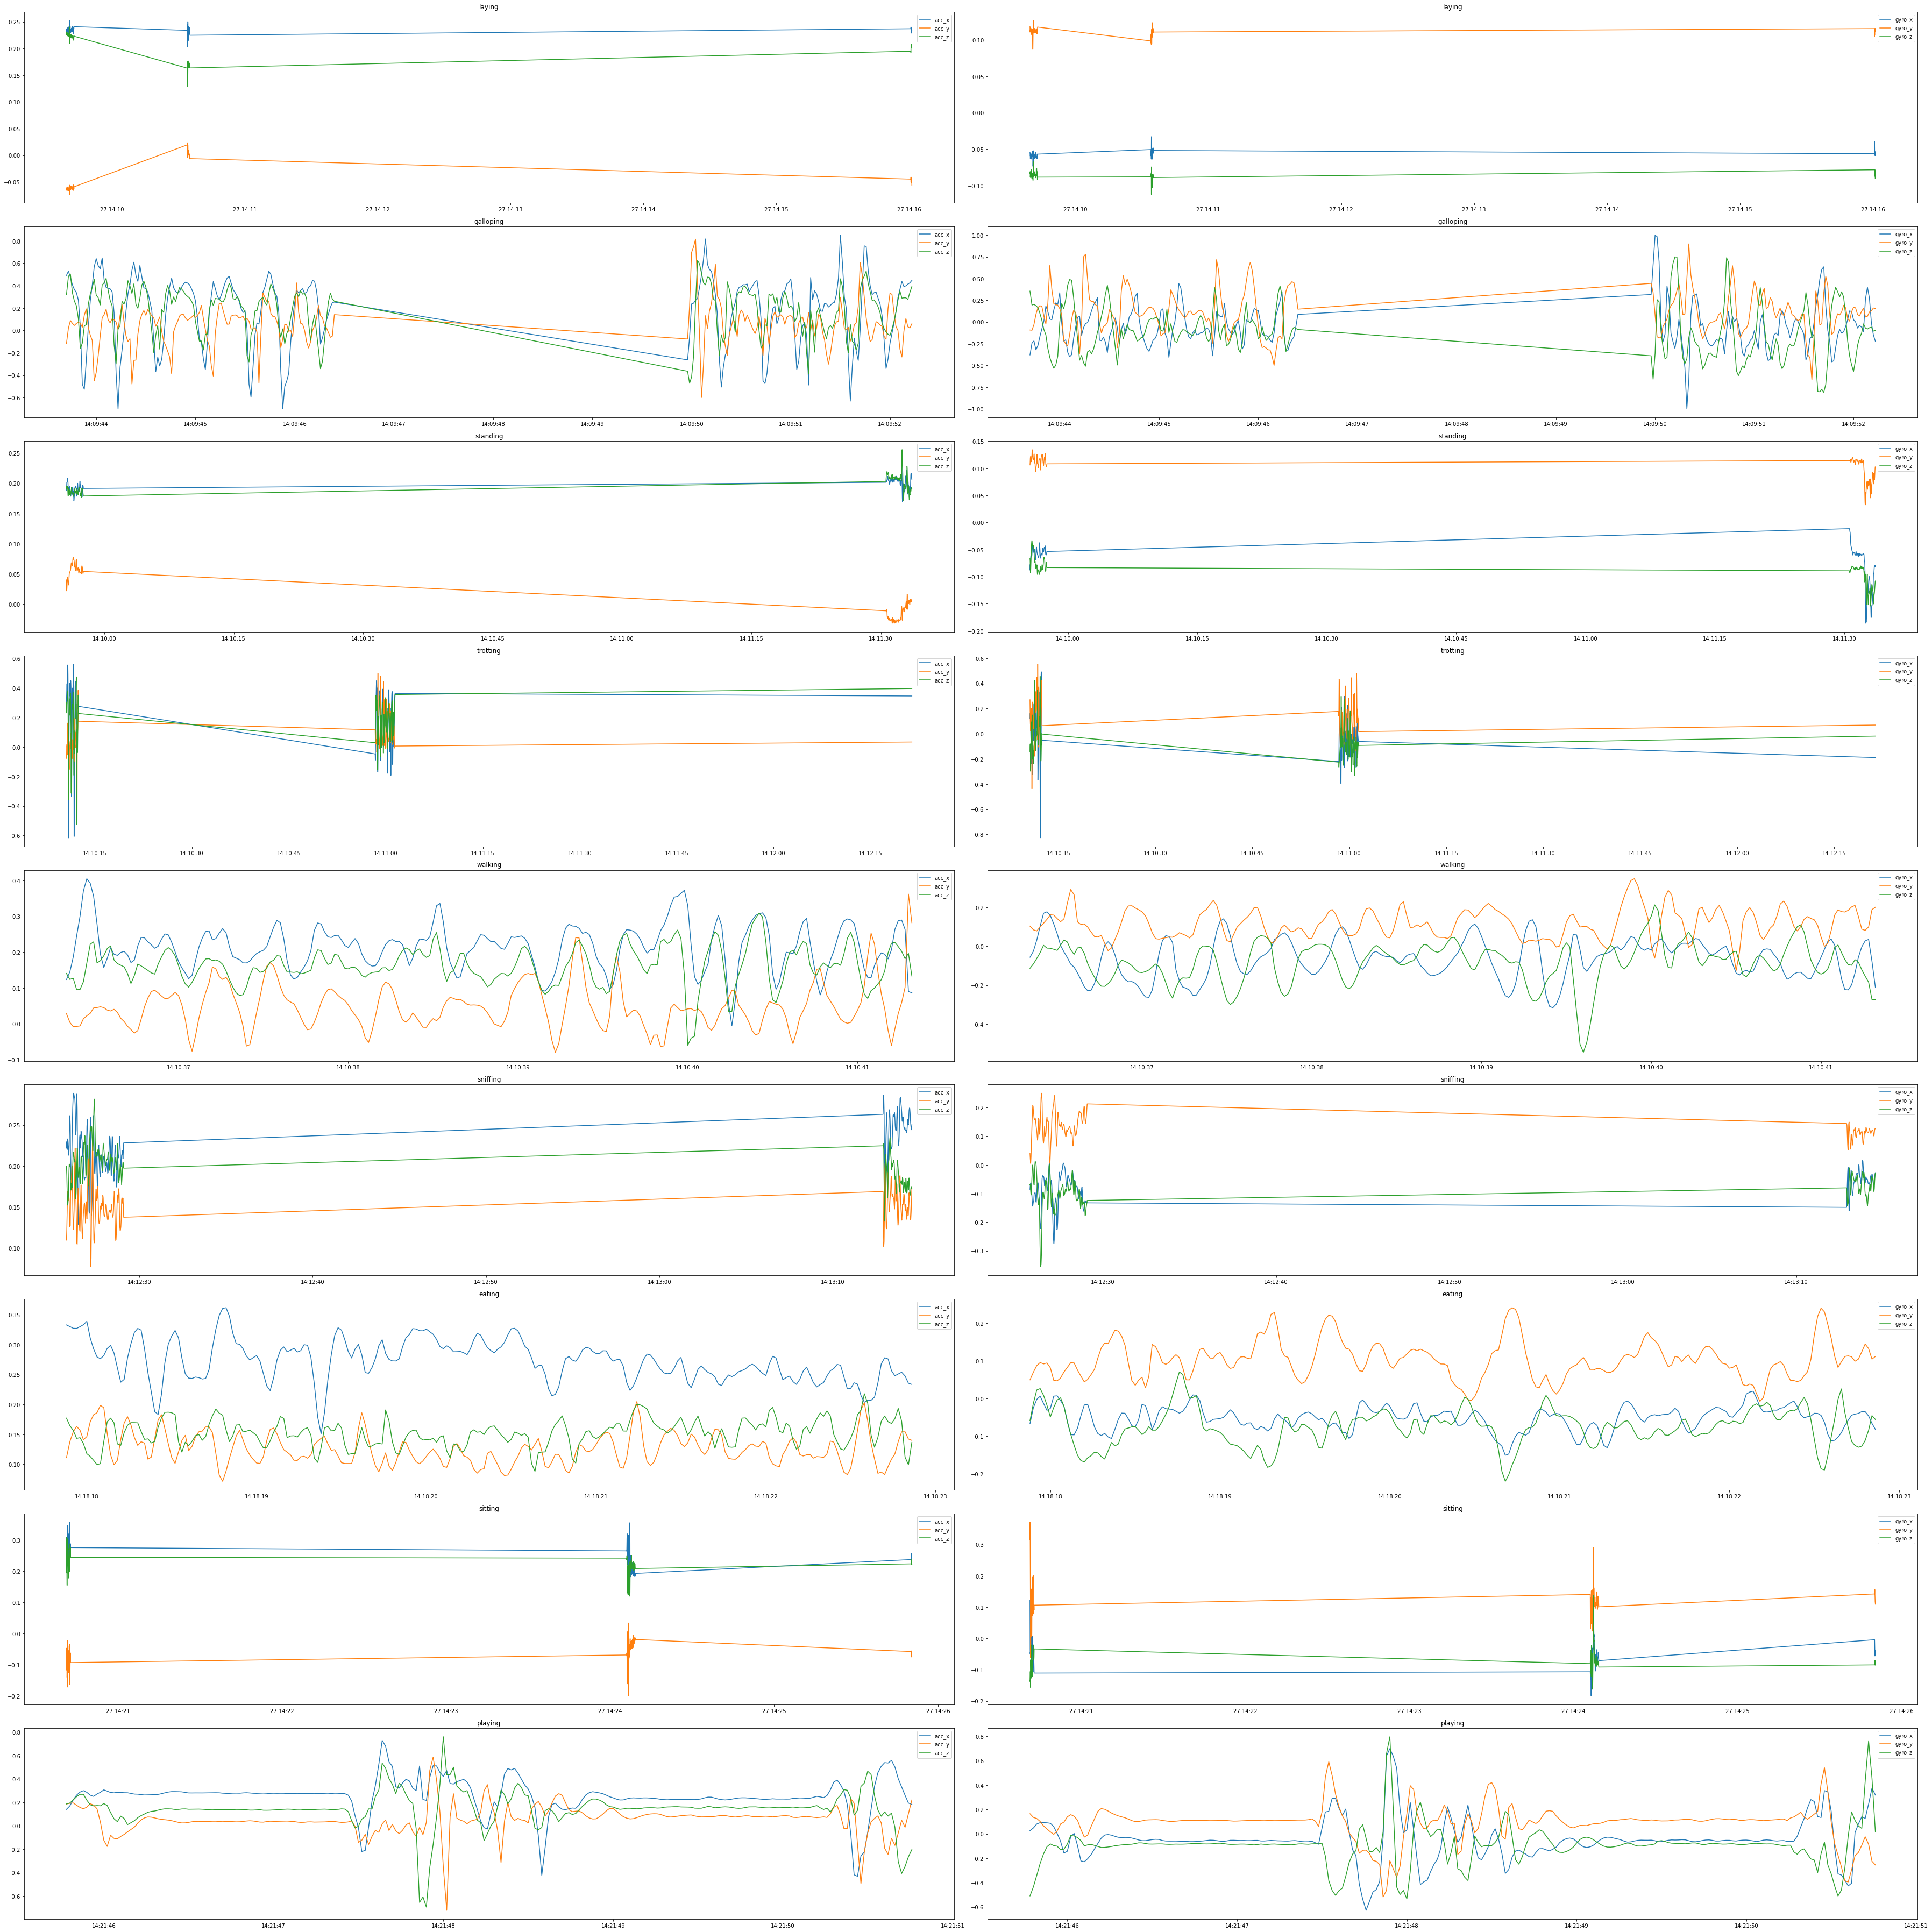

In [16]:
' Plot Acceleration Data XYZ & Gyroscope Data XYZ '
def plot_acc_gyro(df, num_entries=None):
    
    activities = list(df.activity.unique())
    fig, axs = plt.subplots(len(activities), 2, figsize=(50, 50))
    for i, activity in enumerate(activities):
        axs[i, 0].set_title(activity)
        axs[i, 0].plot(df['dt'][df['activity'] == activity][:250], 
                       df['acc_x'][df['activity'] == activity][:250], label='acc_x')
        axs[i, 0].plot(df['dt'][df['activity'] == activity][:250], 
                       df['acc_y'][df['activity'] == activity][:250], label='acc_y')
        axs[i, 0].plot(df['dt'][df['activity'] == activity][:250], 
                       df['acc_z'][df['activity'] == activity][:250], label='acc_z')
        axs[i, 0].legend()

        axs[i, 1].set_title(activity)
        axs[i, 1].plot(df['dt'][df['activity'] == activity][:250], 
                       df['gyro_x'][df['activity'] == activity][:250], label='gyro_x')
        axs[i, 1].plot(df['dt'][df['activity'] == activity][:250], 
                       df['gyro_y'][df['activity'] == activity][:250], label='gyro_y')
        axs[i, 1].plot(df['dt'][df['activity'] == activity][:250], 
                       df['gyro_z'][df['activity'] == activity][:250], label='gyro_z')
        axs[i, 1].legend()
    fig.tight_layout()
    
plot_acc_gyro(norm_labelledDFList[0])

Want to find discontinuous in data 
- to check the amount of 'samples' we have for a certain activity

In [17]:
import statistics as st

In [19]:
def check_duration(df):
    
    activities = list(df.activity.unique())
    col_activity = df['activity'].tolist()
    
    
    activity_time_dict = {'sniffing':[], 'walking':[], 'trotting':[], 
                          'galloping':[], 'eating':[], 'sitting':[], 
                          'playing':[], 'laying':[], 'standing':[]}
    prev_act = col_activity[0]
    last_i = 0
    for i in range(len(col_activity)):
        curr_act = col_activity[i]
        if curr_act != prev_act:
            print('i: %i // prev_act: %s  // curr_act: %s'%(i, prev_act, curr_act))
#             print("Datapoints: ", int(i-last_i))
            activity_time_dict[prev_act].append(int(i-last_i))
            prev_act = curr_act
            last_i = i
    print(activity_time_dict)
    
    
    activity_avgtime_dict = dict()
    for i in activities:
        avg_time = st.mean(activity_time_dict.get(i))
        min_time = min(activity_time_dict.get(i))
        max_time = max(activity_time_dict.get(i))
#         print('Activity: %s | avgTime: %f  | min: %i  | max: %i'%(i, avg_time, min_time, max_time))
        activity_avgtime_dict[i] = avg_time
    print(activity_avgtime_dict)
        

In [ ]:
check_duration(df_201116)

## Wavelet Transform

In [20]:
import pywt
from scipy.fft import fft

wavelist = pywt.wavelist(kind='continuous')
wavelist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

Which Wavelet should we choose as Mother Wavelet?
- Energy: tell us about similarity of the signal and mother wavelet which used and mother wavelet with highest energy is select.
- Entropy: tell us about data missing of the signal and mother wavelet which used and mother wavelet with lowest entropy is select.

In [21]:
norm_labelledDFList[0]['activity'] = norm_labelledDFList[0]['activity'].astype('category')

activities_dict = dict( enumerate(norm_labelledDFList[0]['activity'].cat.categories ) )
activities_dict[9] = 'barking'
activities_dict[10] = 'jumping'
activities_dict

{0: 'eating',
 1: 'galloping',
 2: 'laying',
 3: 'playing',
 4: 'sitting',
 5: 'sniffing',
 6: 'standing',
 7: 'trotting',
 8: 'walking',
 9: 'barking',
 10: 'jumping'}

In [22]:
list(activities_dict.values())

['eating',
 'galloping',
 'laying',
 'playing',
 'sitting',
 'sniffing',
 'standing',
 'trotting',
 'walking',
 'barking',
 'jumping']

In [25]:
def sampling(labelledDFList, activities_dict, N=80):
    # Every N data points (1.6s)
    
    list_np_X = list()
    list_np_Y = list()
    for i, df in enumerate(labelledDFList):
        
        print('Sampling... ', i)
        
        IMU_data = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
        
#         activities_dict = dict(enumerate(df['activity'].astype('category').cat.categories))
#         print(activities_dict)
        Y_N = np.array([ list(activities_dict.values()).index(i) for i in df['activity']])
        Y_N = Y_N.reshape(len(Y_N), 1)

        X_N = df[IMU_data].to_numpy()
#         X_N = df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']].to_numpy()

        XY_N = np.concatenate((X_N, Y_N), axis=1)
#         print(XY_N.shape)
        XY_N = np.array([ XY_N[i:i+N] for i in range(0,len(XY_N)-N,N) if (XY_N[i][-1] == XY_N[i+N][-1])])
#         print(XY_N.shape)
        i_del = np.array([ i for i in range(len(XY_N)) if not all(x == XY_N[i][:,-1][0] for x in XY_N[i][:,-1])], dtype=object)
#         print('i_del = ', i_del)
        
        if len(i_del) != 0:
            XY_N = np.delete(XY_N, obj=i_del[0], axis=0)
        # XY_N = XY_N.reshape(len(XY_N), N, 7)
#         print(XY_N.shape)

        X_N = XY_N[:,:,np.arange(len(IMU_data))]
        Y_N = XY_N[:,:,-1]
        Y_N = np.array([i[0] for i in Y_N])
#         print(X_N.shape, Y_N.shape)
        
        list_np_X.append(X_N)
        list_np_Y.append(Y_N)
    
    dataX = np.concatenate(list_np_X, axis=0)
    dataY = np.concatenate(list_np_Y, axis=0)
    
    print(dataX.shape, dataY.shape)
    
#     data = np.column_stack((dataX, dataY.T))
    
#     print(data.shape)
    
    return dataX, dataY

In [26]:
X, Y = sampling(norm_labelledDFList, activities_dict)

Sampling...  0
Sampling...  1
Sampling...  2
Sampling...  3
Sampling...  4
(2697, 80, 6) (2697,)


Y_80 = df_201116['activity'].astype('category').cat.codes.to_numpy()
Y_80 = Y_80.reshape(len(Y_80), 1)

X_80 = df_201116[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']].to_numpy()

XY_80 = np.concatenate((X_80, Y_80), axis=1)
print(XY_80.shape)
XY_80 = np.array([ XY_80[i:i+80] for i in range(0,len(XY_80)-80,80) if (XY_80[i][-1] == XY_80[i+80][-1])])
print(XY_80.shape)
i_del = np.array([ i for i in range(len(XY_80)) if not all(x == XY_80[i][:,-1][0] for x in XY_80[i][:,-1])], dtype=object)
XY_80 = np.delete(XY_80, obj=i_del[0], axis=0)
print(XY_80.shape)

X_80 = XY_80[:,:,[0,1,2,3,4,5]]
Y_80 = XY_80[:,:,-1]
Y_80 = np.array([i[0] for i in Y_80])
print(X_80.shape, Y_80.shape)

In [27]:
# Wavelet Transforms 
def cwt_coeffs(X, n_scales=64, wavelet_name='morl'):
    
    scales = np.arange(1, n_scales + 1)
    
    X_cwt = np.empty((len(X), X.shape[2]))
    for signal in range(X.shape[2]):
        print('signal', signal)
        
        coeffs_list = list()
        for sample in range(X.shape[0]):
            
#             print(sample)
            coeffs, freqs = pywt.cwt(X[sample, :, signal], scales, wavelet_name) 
            coeffs_mean = [ np.mean(i) for i in coeffs ]
            coeffs_mean = np.mean(coeffs_mean)
#             print('coeffs mean: ', coeffs_mean)
            coeffs_list.append(coeffs_mean)
#             coeffs_list = np.array(coeffs_list).reshape(len(coeffs_list), 1)
#             break
                     
        if signal == 0:
            coeffs_list = np.array(coeffs_list).reshape(len(coeffs_list), 1)
            X_cwt = coeffs_list
        else:
            coeffs_list = np.array(coeffs_list).reshape(len(coeffs_list), 1)
            X_cwt = np.concatenate((X_cwt, coeffs_list), axis=1)
        
#         print(coeffs_list.shape)
#         coeffs_signal_list.append(coeffs_list)

#     coeffs_signal_list = np.array(coeffs_signal_list).reshape(len(coeffs_signal_list), 1)
#     X_cwt = coeffs_signal_list.reshape(-1)
    print(X_cwt.shape)
    return X_cwt
        
X_cwt = cwt_coeffs(X)

signal 0
signal 1
signal 2
signal 3
signal 4
signal 5
(2697, 6)


In [ ]:
from sklearn.decomposition import PCA

def pca_of_cwt_coeffs(X, n_scales, wavelet_name="morl"):
    # apply PCA for just a single component to get the most significant coefficient per scale
    pca = PCA(n_components = 1)
    # create range of scales
    scales = np.arange(1, n_scales + 1)
    
    X_pca = np.array([])  
    for signal in range(X.shape[2]):
#         print('signal',signal)
        pca_comps = np.empty((0, n_scales),dtype='float32')
        for sample in range(X.shape[0]):
#             print('sample', sample)
            coeffs, freqs = pywt.cwt(X[sample, :, signal], scales, wavelet_name)   
#             print(pca.fit_transform(coeffs).flatten())
            pca_comps = np.vstack([pca_comps, pca.fit_transform(coeffs).flatten()]) 
#             print(pca_comps)
        
        if signal == 0:
            X_pca = pca_comps
        else:
            X_pca = np.concatenate((X_pca, pca_comps), axis=1)
            
    return X_pca
 
# define the scale size
n_scales = 64

X_pca = pca_of_cwt_coeffs(X, n_scales)
print(f"shapes (n_samples, n_comps) of X_train_pca: {X_pca.shape}")
# shapes (n_samples, n_comps) of X_train_pca: (789, 384)
# 384 because 64(scales)x6(IMU axis) = 384

In [28]:
def plot_cwt(df, activities, scales, wavelet):
#     scales = np.arange(1,65)
#     wavelet = 'morl' # mother wavelet
    
    fig, ax = plt.subplots(len(activities), 6, figsize=(50,50))
    cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
    for idx, activity in enumerate(activities):

        # 80 corresponds to 1.6s
        df_ =  df[df['activity'] == activity][:80]
        X = df_[cols].to_numpy()
        for i in range(6):
            coeffs, freqs = pywt.cwt(X[:, i], scales, wavelet=wavelet)
#             print(np.array(coeffs).shape)
#             print(coeffs[0],freqs[0])
#             # create scalogram
            ax[idx, i].imshow(coeffs, cmap = 'coolwarm')
            ax[idx, i].set_title(activity+' '+cols[i])
            ax[idx, i].spines['right'].set_visible(False)
            ax[idx, i].spines['top'].set_visible(False)
            ax[idx, i].set_ylabel('Scale')
            ax[idx, i].set_xlabel('Time')

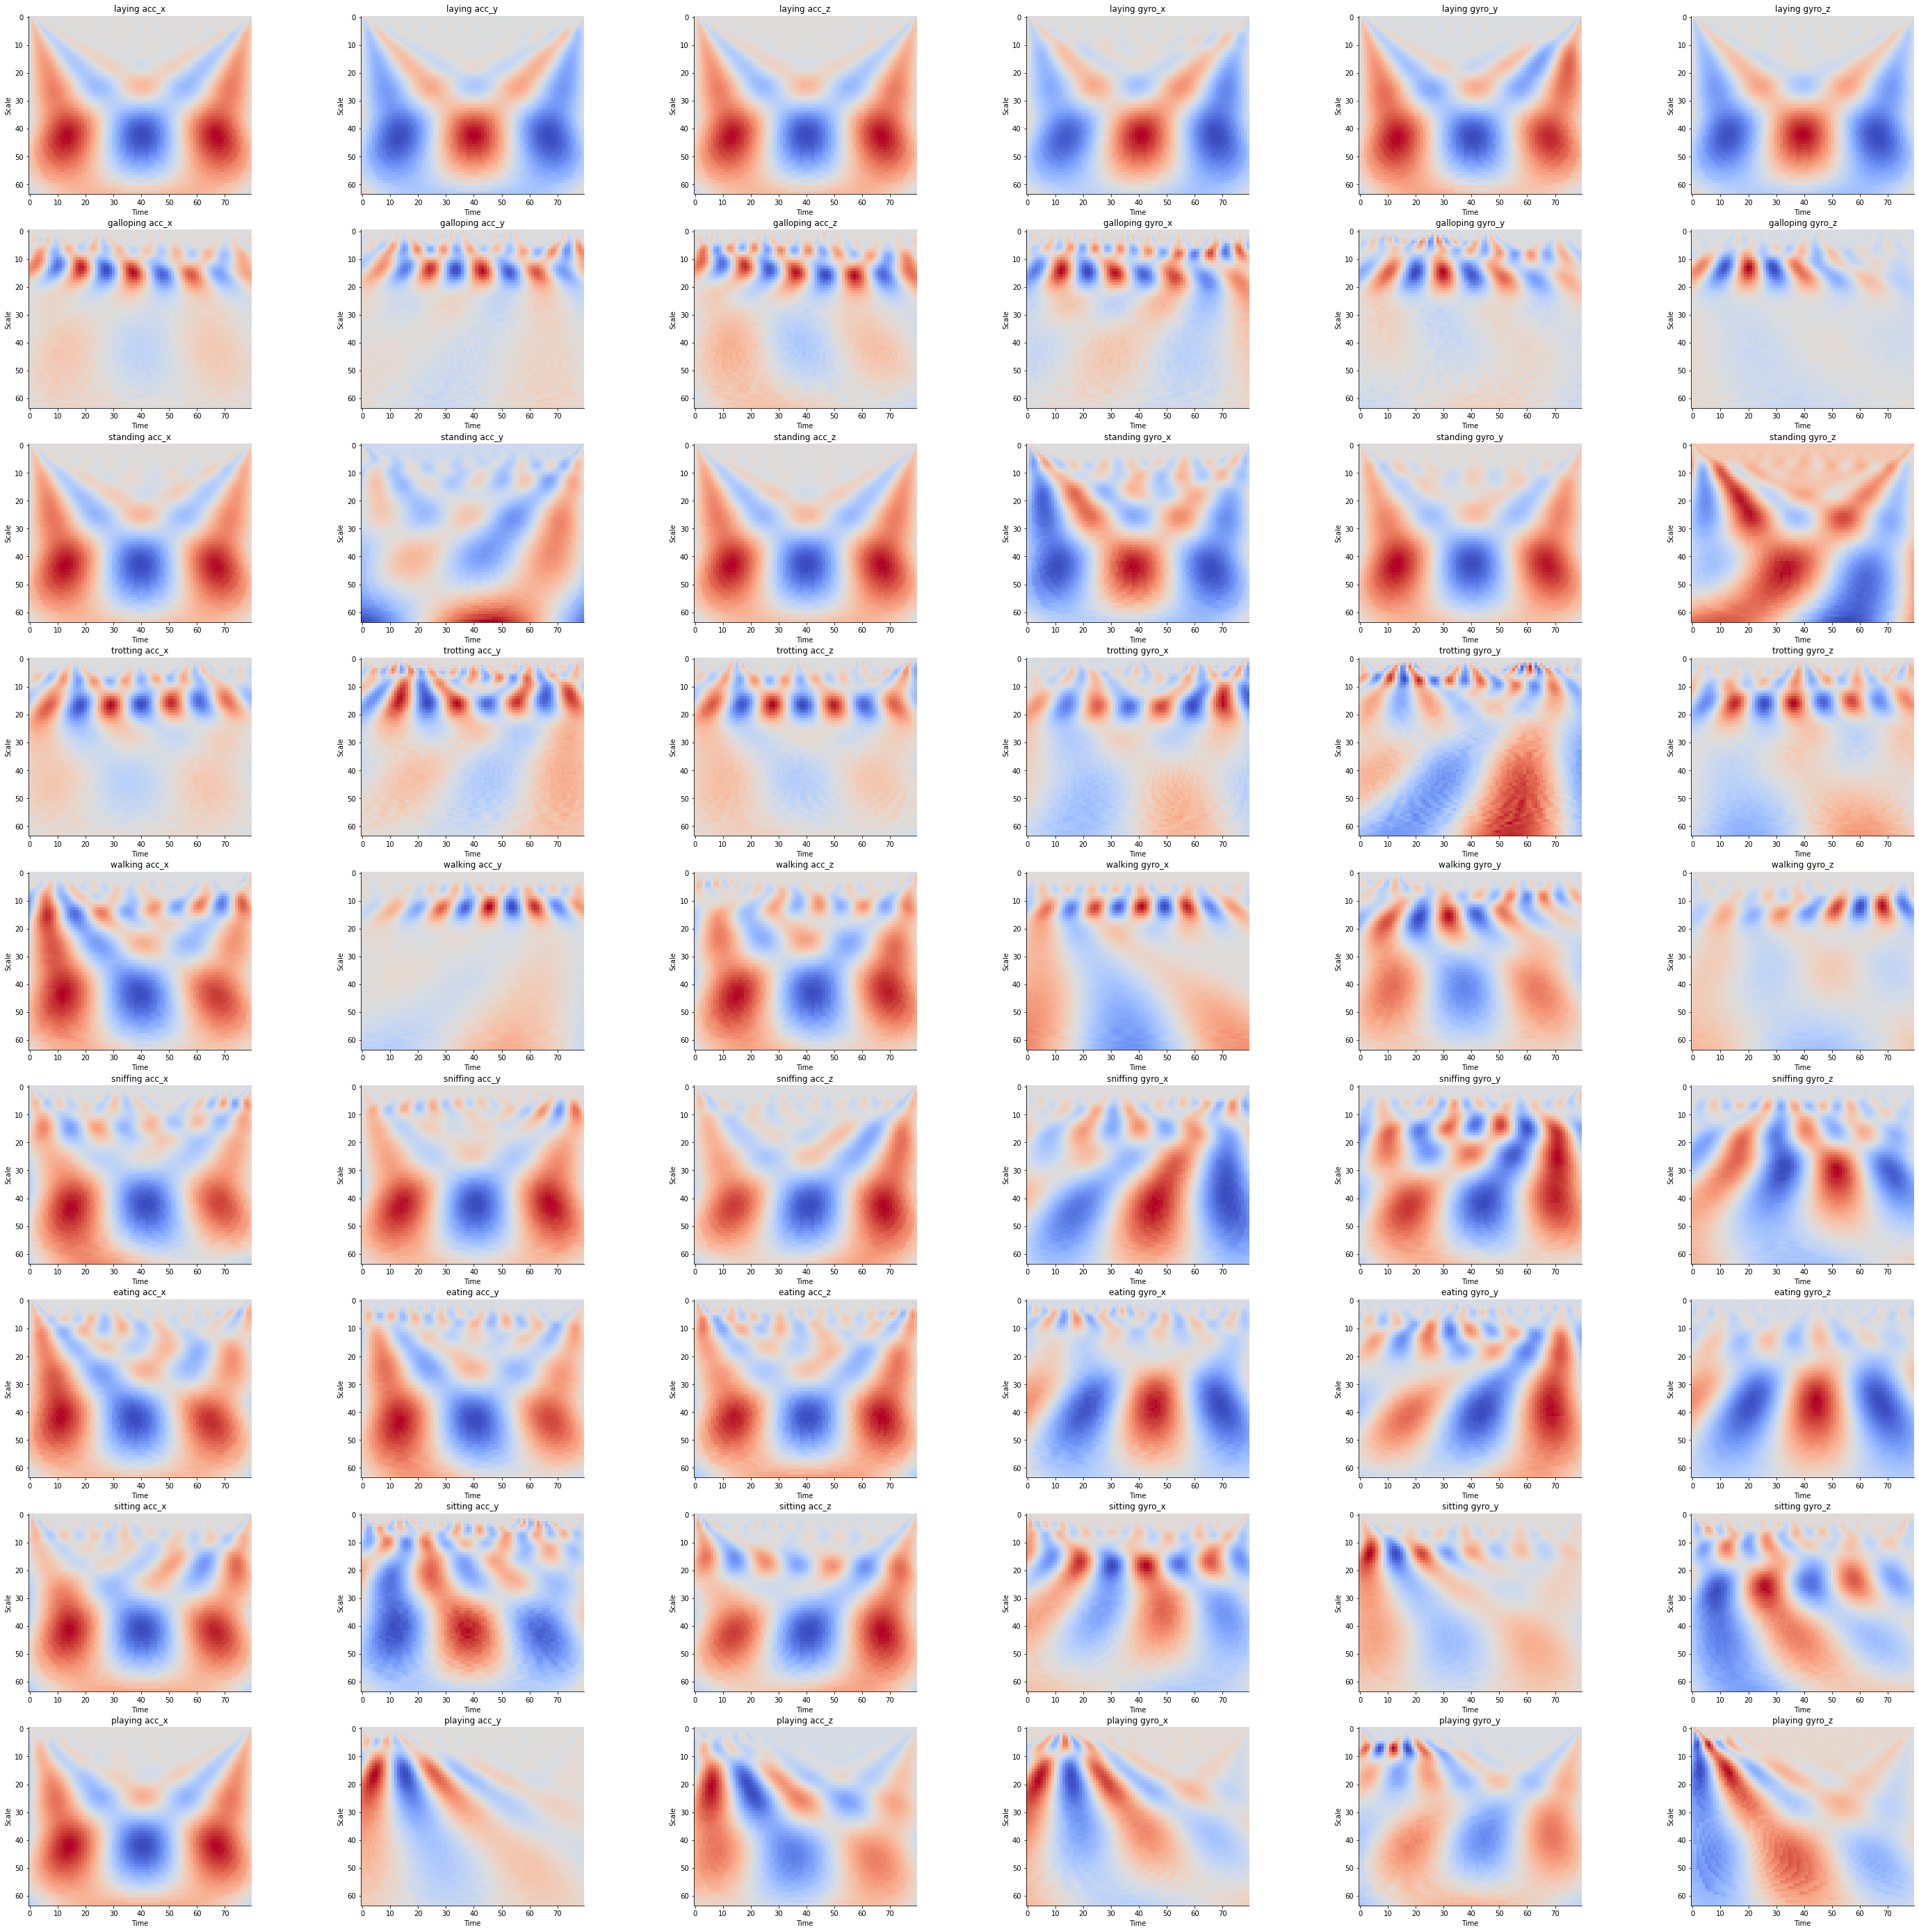

In [29]:
# Using scales of up to 64 ; 128 doesnt give too much info at lower f anyways
scales = np.arange(1,65)
wavelet = 'morl' # mother wavelet

activities = list(norm_labelledDFList[0].activity.unique())
plot_cwt(norm_labelledDFList[0], activities, scales, wavelet)

### Oversampling

11733 new random picked points
(14430, 6)


<AxesSubplot:title={'center':'Count (target)'}>

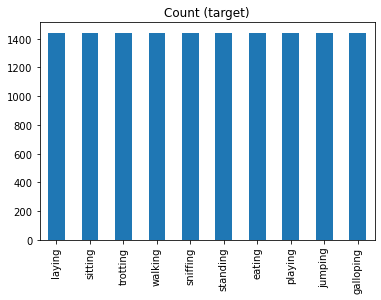

In [30]:
# Oversample imbalanced activity 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_cwt, Y)

print(X_ros.shape[0] - X_cwt.shape[0], 'new random picked points')
print(X_ros.shape)
df_ros = pd.DataFrame(X_ros)
df_ros['activity'] = [activities_dict.get(i) for i in y_ros]
df_ros.activity.value_counts().plot(kind='bar', title='Count (target)')




In [31]:
import seaborn as sns
from sklearn import metrics

def create_confusion_matrix(y_pred, y_test):    
    #calculate the confusion matrix
    confmat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(confmat, cmap=plt.cm.Blues, alpha=0.5)

    n_labels = len(activities_dict.values())
    ax.set_xticks(np.arange(n_labels))
    ax.set_yticks(np.arange(n_labels))
    ax.set_xticklabels(activities_dict.values())
    ax.set_yticklabels(activities_dict.values())

    # rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # loop over data dimensions and create text annotations.
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=i, y=j, s=confmat[i, j], va='center', ha='center')
    
    # avoid that the first and last row cut in half
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

[0]	validation_0-merror:0.29717	validation_1-merror:0.31604


/home/ysk2a15/.conda/envs/gdp/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ysk2a15/.conda/envs/gdp/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	validation_0-merror:0.25703	validation_1-merror:0.27593
[2]	validation_0-merror:0.23355	validation_1-merror:0.25620
[3]	validation_0-merror:0.23304	validation_1-merror:0.24948
[4]	validation_0-merror:0.21690	validation_1-merror:0.23162
[5]	validation_0-merror:0.20552	validation_1-merror:0.21945
[6]	validation_0-merror:0.18773	validation_1-merror:0.20328
[7]	validation_0-merror:0.18153	validation_1-merror:0.19614
[8]	validation_0-merror:0.17377	validation_1-merror:0.18627
[9]	validation_0-merror:0.16032	validation_1-merror:0.17346
[10]	validation_0-merror:0.14977	validation_1-merror:0.16296
[11]	validation_0-merror:0.13788	validation_1-merror:0.15435
[12]	validation_0-merror:0.12836	validation_1-merror:0.14931
[13]	validation_0-merror:0.12154	validation_1-merror:0.14028
[14]	validation_0-merror:0.11378	validation_1-merror:0.13272
[15]	validation_0-merror:0.11026	validation_1-merror:0.12957
[16]	validation_0-merror:0.10612	validation_1-merror:0.12579
[17]	validation_0-merror:0.09795	

[135]	validation_0-merror:0.00155	validation_1-merror:0.02814
[136]	validation_0-merror:0.00135	validation_1-merror:0.02793
[137]	validation_0-merror:0.00124	validation_1-merror:0.02793
[138]	validation_0-merror:0.00135	validation_1-merror:0.02793
[139]	validation_0-merror:0.00124	validation_1-merror:0.02793
[140]	validation_0-merror:0.00124	validation_1-merror:0.02793
[141]	validation_0-merror:0.00124	validation_1-merror:0.02772
[142]	validation_0-merror:0.00124	validation_1-merror:0.02793
[143]	validation_0-merror:0.00124	validation_1-merror:0.02814
[144]	validation_0-merror:0.00124	validation_1-merror:0.02814
[145]	validation_0-merror:0.00114	validation_1-merror:0.02793
[146]	validation_0-merror:0.00114	validation_1-merror:0.02793
[147]	validation_0-merror:0.00124	validation_1-merror:0.02751
[148]	validation_0-merror:0.00124	validation_1-merror:0.02751
[149]	validation_0-merror:0.00124	validation_1-merror:0.02793
[150]	validation_0-merror:0.00103	validation_1-merror:0.02772
[151]	va

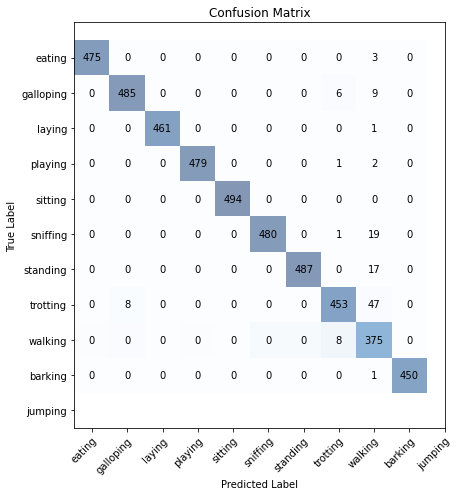

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

def build_and_fit_xgb_model(X_train, y_train, X_test, y_test, n_depth, subsample, n_estimators):
    xgb_model = xgb.XGBClassifier(max_depth=n_depth, 
                              objective='multi:softmax', # error evaluation for multiclass training
                              num_class=6, 
                              subsample=subsample, # randomly selected fraction of training samples that will be used to train each tree.
                              n_estimators=n_estimators) 
    eval_set = [(X_train, y_train), (X_test, y_test)]
    history = xgb_model.fit(X_train, y_train, eval_metric=["merror"], eval_set=eval_set,verbose=True)
    return xgb_model, history


X_train, X_test ,y_train, y_test = train_test_split(X_ros, y_ros.reshape(len(y_ros), 1), test_size=0.33, random_state=42)

# df_train = pd.DataFrame(y_train, columns=['activity'])
# print('Train: ',df_train.activity.value_counts())
# df_test = pd.DataFrame(y_test, columns=['activity'])
# print('Test: ',df_test.activity.value_counts())

# define and train model    
trained_xgb_model, xgb_history = build_and_fit_xgb_model(X_train, y_train, X_test, y_test, 4, 0.5, 200)

# make predictions for test data
y_pred = trained_xgb_model.predict(X_test)
# determine the total accuracy 
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

create_confusion_matrix(y_pred, y_test)

In [34]:
from imblearn.under_sampling import RandomUnderSampler

def split_test_train(data, excluded_activities=[], test_ratio=0.25, perform_one_hot=False):
    excluded_activities.append('None')
    new_data = data[~data['activity'].isin(excluded_activities)]
    activities = new_data['activity'].unique()
    print("Activity Data Count:")
    print(new_data['activity'].value_counts())
    print()
    print("Undersampling to: " + str(np.min(new_data['activity'].value_counts())) + " data points per activity" )
    independent_data = new_data.drop(['activity'], axis=1)
    print(independent_data)
    
    one_hot=new_data['activity'].to_numpy()
    print(one_hot)
    if(perform_one_hot):
        one_hot = pd.get_dummies(new_data['activity'])
        rus = RandomUnderSampler()
        X_resampled, y_resampled = rus.fit_resample(independent_data.to_numpy(), one_hot.to_numpy())
        #Returns X_train,X_test,y_train,y_test, independent_data.columns, one_hot.columns
        return (train_test_split(X_resampled,y_resampled,test_size=test_ratio), independent_data.columns, one_hot.columns)
    else:
        one_hot=new_data['activity'].to_numpy()
        rus = RandomUnderSampler()
        X_resampled, y_resampled = rus.fit_resample(independent_data.to_numpy(), one_hot)
        #Returns X_train,X_test,y_train,y_test, independent_data.columns, one_hot.columns
        return (train_test_split(X_resampled,y_resampled,test_size=test_ratio), independent_data.columns, [])

In [35]:
from sklearn.metrics import confusion_matrix
import time

def train_classifier(classifier, data, exclude=[], test_fraction=0.25, name = 'Classifier', perform_one_hot=False, test_dataset=None):
    if(test_dataset is not None):
        (X_train,j,y_train,j),variable_columns, one_hot_columns = split_test_train(data, excluded_activities=exclude, test_ratio=0.05, perform_one_hot=perform_one_hot)
        (j,X_test,j,y_test),j, j = split_test_train(test_dataset, excluded_activities=exclude, test_ratio=0.95, perform_one_hot=perform_one_hot)
    else:
        (X_train,X_test,y_train,y_test),variable_columns, one_hot_columns = split_test_train(data, excluded_activities=exclude, test_ratio=test_fraction, perform_one_hot=perform_one_hot)
    
    

    print(y_train)
    # Train classifier
    print("Training " + name + "...")
    start_time = time.time()
    classifier.fit(X_train,y_train)
    end_time = time.time()
    print(name + " Training Complete in " + str(end_time-start_time) + " seconds")
    print()
    
    # Conduct testing
    print("Testing...")
    log_prob = classifier.predict_log_proba(X_test)
    correct_count = 0
    incorrect_count = 0
    predictions = []
    labels = []
    if(perform_one_hot):
        for i in range(0, len(y_test)):
            predict = one_hot_columns[np.argmax([y[1] for y in [x[i] for x in log_prob]])]
            actual = one_hot_columns[np.argmax(y_test[i])]
            if(predict == actual):
                correct_count += 1
            else:
                #print("Predicted: " + predict + " : Actual: " + actual)
                incorrect_count += 1
            predictions.append(predict)
            labels.append(actual)
    else:
        labels = y_test
        predictions = classifier.predict(X_test)
        for i in range(0, len(y_test)):
            if(predictions[i] == labels[i]):
                correct_count += 1
            else:
                #print("Predicted: " + predict + " : Actual: " + actual)
                incorrect_count += 1
    # Print test results
    print("Testing Results:")
    print("Correct Classification: " + str(correct_count))
    print("Incorrect Classification: " + str(incorrect_count))
    print("Accuracy: " + str(100*(correct_count/(correct_count+incorrect_count))) + "%")
    
    # Create confusion matrix
    if(perform_one_hot):
        conf_labels = list(set(labels))
    else:
        conf_labels=np.unique(predictions)
    #conf_labels = ['laying', 'standing', 'sitting', 'eating', 'walking', 'sniffing', 'trotting', 'playing', 'galloping', 'jumping']
    if(len(conf_labels) == 0):
        cm = confusion_matrix(labels, predictions, labels=conf_labels)
        print(cm)
    else:
        cm = confusion_matrix(labels, predictions, labels=conf_labels)
    percentageMap = []
    for i in range(0, len(cm)):
        percentageMap.append([])
        sum = np.sum(cm[i])
        for j in range(0, len(cm[i])):
            if(sum != 0):
                percentageMap[i].append( float(cm[i][j])/float(sum))
            else:
                percentageMap[i].append(0)

    # Plot confusion matrix    
    plt.figure(figsize=(25, 18))
    ax1 = sns.heatmap(percentageMap, annot=True, fmt='.2%', xticklabels = conf_labels, yticklabels=conf_labels)
    plt.title("Confusion Matrix of " + name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.yticks(rotation=0)
    plt.show()
    
    featureImportances = pd.Series(classifier.feature_importances_)#.sort_values(ascending=False)
    
    plt.figure(figsize=(60, 25))
    ax2 = sns.barplot(x=variable_columns, y=featureImportances)
    plt.title("Feature Importance of " + name) 
    plt.xticks(rotation=75)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

Activity Data Count:
laying       1443
sitting      1443
trotting     1443
walking      1443
sniffing     1443
standing     1443
eating       1443
playing      1443
jumping      1443
galloping    1443
Name: activity, dtype: int64

Undersampling to: 1443 data points per activity
              0         1         2         3         4         5
0      0.048865 -0.013293  0.047513 -0.013404  0.022537 -0.018039
1      0.048780 -0.012647  0.046037 -0.012782  0.023271 -0.016357
2      0.071932  0.022446  0.036765  0.028780  0.026659 -0.022132
3      0.030813  0.019568  0.032208  0.001149  0.011018 -0.061964
4      0.090585  0.003205  0.055135 -0.019058 -0.008013 -0.010058
...         ...       ...       ...       ...       ...       ...
14425  0.025639 -0.024120  0.024119  0.040290 -0.020023 -0.031320
14426  0.011188 -0.026984  0.001974  0.023141 -0.008691 -0.029008
14427  0.011188 -0.026984  0.001974  0.023141 -0.008691 -0.029008
14428  0.025639 -0.024120  0.024119  0.040290 -0.020023 -0.03

/home/ysk2a15/.conda/envs/gdp/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Extra Trees Training Complete in 6.77834939956665 seconds

Testing...


/home/ysk2a15/.conda/envs/gdp/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:725: RuntimeWarning: divide by zero encountered in log
  proba[k] = np.log(proba[k])


Testing Results:
Correct Classification: 4243
Incorrect Classification: 86
Accuracy: 98.01339801339802%


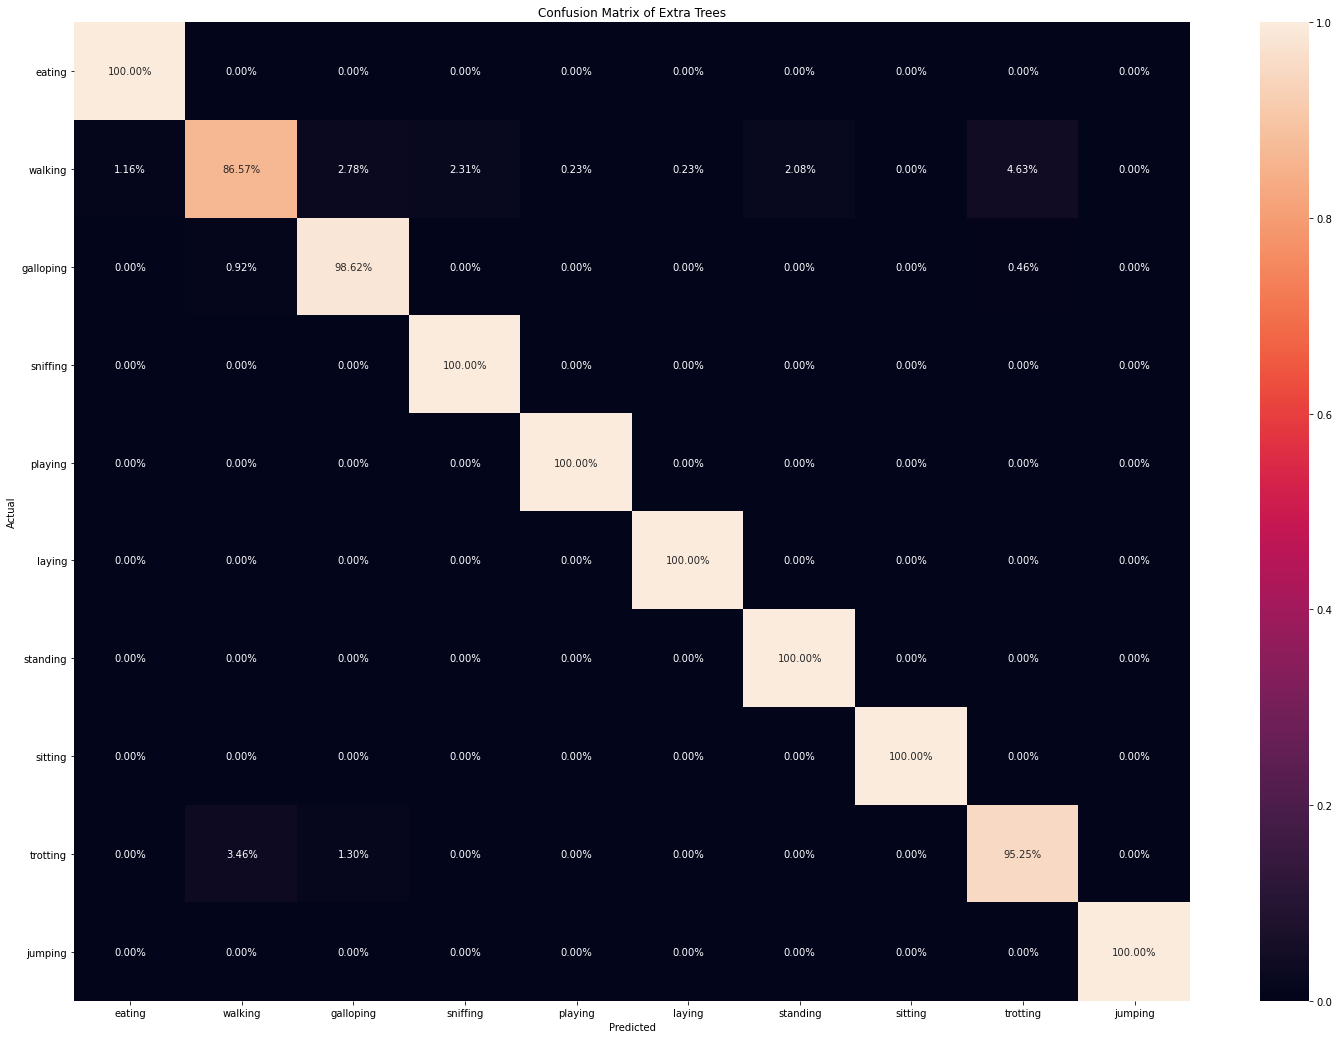

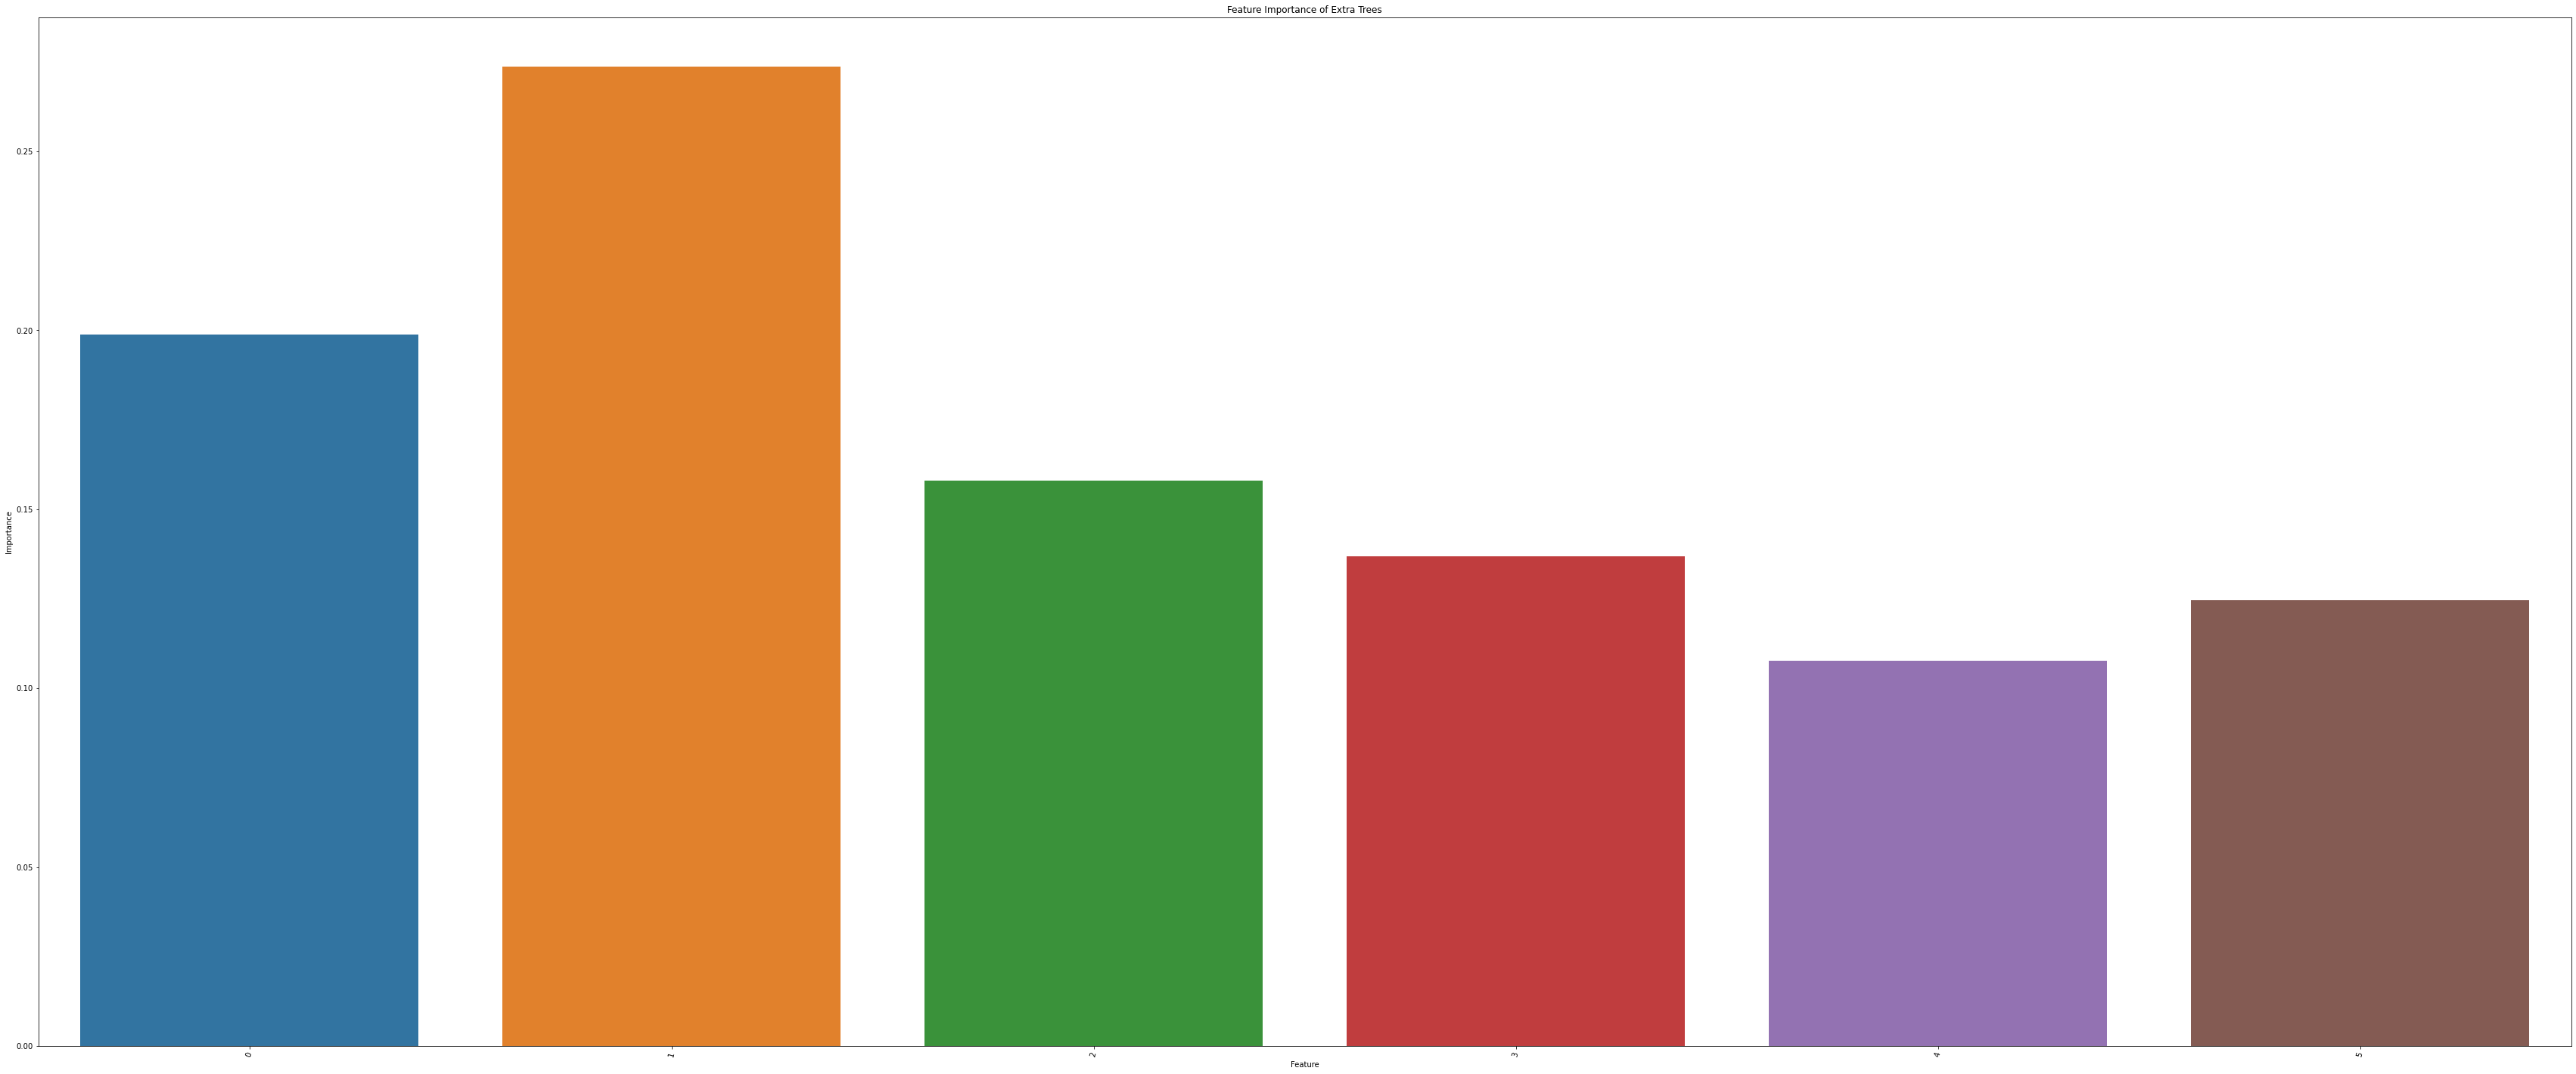

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

activities_to_exclude = [] #['barking', 'eating', 'jumping', 'playing', 'standing']

# train_classifier(RandomForestClassifier(n_estimators=10, verbose=0), df_ros, exclude=activities_to_exclude, name='Random Forest', test_fraction = 0.3, perform_one_hot=True, test_dataset=labelledDFList[0])
# train_classifier(ExtraTreesClassifier(n_estimators=300, criterion='entropy'), df_ros, exclude=activities_to_exclude, name='Extra Trees', test_fraction = 0.3, perform_one_hot=True)
# train_classifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators = 100), df_ros, exclude=activities_to_exclude, name='Ada Boost', test_fraction = 0.3, perform_one_hot=False, test_dataset=labelledDFList[0])
train_classifier(ExtraTreesClassifier(n_estimators=300, criterion='entropy'), df_ros, exclude=activities_to_exclude, name='Extra Trees', test_fraction = 0.3, perform_one_hot=True)
# train_classifier(GradientBoostingClassifier(n_estimators=300, criterion='friedman_mse'), df_ros, exclude=activities_to_exclude, name='Gradient Boosting', test_fraction = 0.3, perform_one_hot=False)

## Deep Learning Analysis 
### - CNN with LeNet-5 architecture
https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442

In [45]:
X.shape

(2697, 80, 6)

In [47]:
from skimage.transform import resize

def create_cwt_images(X, n_scales, rescale_size, wavelet_name = "morl"):
    n_samples = X.shape[0] 
    n_signals = X.shape[2] 
    
    # range of scales from 1 to n_scales
    scales = np.arange(1, n_scales + 1) 
    
    # pre allocate array
    X_cwt = np.ndarray(shape=(n_samples, rescale_size, rescale_size, n_signals), dtype = 'float32')
    
    for sample in range(n_samples):
        if sample % 80 == 0:
            print(sample)
        for signal in range(n_signals):
            serie = X[sample, :, signal]
            # continuous wavelet transform 
            coeffs, freqs = pywt.cwt(serie, scales, wavelet_name)
            # resize the 2D cwt coeffs
            rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')
            X_cwt[sample,:,:,signal] = rescale_coeffs
            
    return X_cwt
  
# amount of pixels in X and Y 
rescale_size = 64
# determine the max scale size
n_scales = 64

X_cwt = create_cwt_images(X, n_scales, rescale_size)
print(f"shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: {X_cwt.shape}")
# X_test_cwt = create_cwt_images(X_test, n_scales, rescale_size)
# print(f"shapes (n_samples, x_img, y_img, z_img) of X_test_cwt: {X_test_cwt.shape}")

X_train_cwt, X_test_cwt ,y_train_cwt, y_test_cwt = train_test_split(X_cwt, Y.reshape(len(Y), 1), test_size=0.33, random_state=42)
print(X_train_cwt.shape, X_test_cwt.shape ,y_train_cwt.shape, y_test_cwt.shape)

0
80
160
240
320
400
480
560
640
720
800
880
960
1040
1120
1200
1280
1360
1440
1520
1600
1680
1760
1840
1920
2000
2080
2160
2240
2320
2400
2480
2560
2640
shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: (2697, 64, 64, 6)
(1806, 64, 64, 6) (891, 64, 64, 6) (1806, 1) (891, 1)


In [56]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
#import keras (high level API) wiht tensorflow as backend
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

def build_cnn_model(activation, input_shape):
    model = Sequential()
    
    # 2 Convolution layer with Max polling
    model.add(Conv2D(32, 5, activation = activation, padding = 'same', input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 5, activation = activation, padding = 'same', kernel_initializer = "he_normal"))
    model.add(MaxPooling2D())  
    model.add(Flatten())
    
    # 3 Full connected layer
    model.add(Dense(128, activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(54, activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(11, activation = 'softmax')) # 6 classes
    
    # summarize the model
    print(model.summary())
    return model

def compile_and_fit_model(model, X_train, y_train, X_test, y_test, batch_size, n_epochs):

    # compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'])
    
    # define callbacks
    callbacks = [ModelCheckpoint(filepath='CNN_cwt.h5',
                                 monitor='val_sparse_categorical_accuracy', 
                                 save_best_only=True)]
    
    # fit the model
    history = model.fit(x=X_train,
                        y=y_train,
                        batch_size=batch_size,
                        epochs=n_epochs,
                        verbose=1,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))
    
    return model, history

# shape of the input images
input_shape = (X_train_cwt.shape[1], X_train_cwt.shape[2], X_train_cwt.shape[3])

# create cnn model
cnn_model = build_cnn_model("relu", input_shape)
# train cnn model
trained_cnn_model, cnn_history = compile_and_fit_model(cnn_model, 
                                                       X_train_cwt, y_train_cwt, 
                                                       X_test_cwt, y_test_cwt, 
                                                       368, 20)

TensorFlow version: 2.2.0
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        4832      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dense_19 (Dense)            

Accuracy: 84.51%


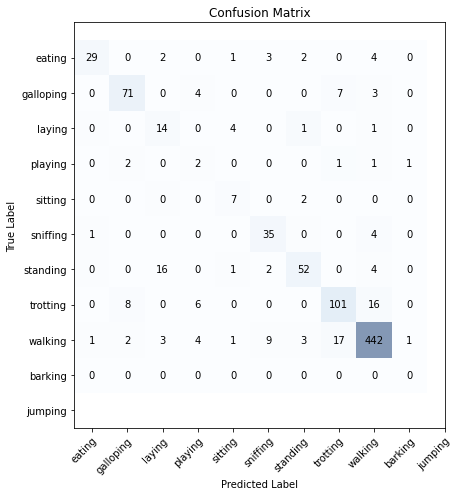

In [57]:
# make predictions for test data
y_pred = trained_cnn_model.predict_classes(X_test_cwt)
# determine the total accuracy 
accuracy = metrics.accuracy_score(y_test_cwt, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

create_confusion_matrix(y_pred, y_test_cwt)